# QSAR aquatic toxicity

accuracy issues

In [1]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.impute import SimpleImputer

#Importing Concrete Compressive Strength Dataset
dataset = pd.read_csv('C:/Users/Manan/Desktop/Fall 2019/Machine Learning COMP6321/Project/Machine-Learning-Project/regression-models/QSAR aquatic toxicity/data/qsar_aquatic_toxicity.csv',sep=";")
data = pd.DataFrame(dataset)

In [2]:
# Check if dataset has null values
result = dataset.isna()
print("-> Contains Missing values                 ",end='')
print(result.values.any())
print("-> Total Number of Missing values:         ",end='')
print(result.sum().sum())
print("-> Number of Missing values by column")
print(result.sum())

-> Contains Missing values                 False
-> Total Number of Missing values:         0
-> Number of Missing values by column
0        0
0.1      0
0.2      0
2.419    0
1.225    0
0.667    0
0.3      0
0.4      0
3.740    0
dtype: int64


In [4]:
X = data.iloc[:, :8].values
Y = data.iloc[:, 8].values

print(data)
print(X.shape)
print(Y.shape)

          0      0.1  0.2  2.419  1.225  0.667  0.3  0.4  3.740
0      0.00    0.000    0  2.638  1.401  0.632    0    0  4.330
1      9.23   11.000    0  5.799  2.930  0.486    0    0  7.019
2      9.23   11.000    0  5.453  2.887  0.495    0    0  6.723
3      9.23   11.000    0  4.068  2.758  0.695    0    0  5.979
4    215.34  327.629    3  0.189  4.677  1.333    0    4  6.064
..      ...      ...  ...    ...    ...    ...  ...  ...    ...
540   24.06   35.776    2  3.326  2.837  0.849    2    0  4.651
541    9.23   11.000    0  3.275  2.727  0.874    0    0  3.953
542    0.00    0.000    0  5.165  3.111  0.732    0    0  6.219
543   13.14    9.507    0  2.859  2.614  0.827    0    0  4.995
544    0.00    0.000    0  2.255  1.800  0.917    0    0  2.480

[545 rows x 9 columns]
(545, 8)
(545,)


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 0)

In [6]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [17]:
# Model Accuracy
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

#Defining kernel for GaussianProcessRegressor
#kernel=None would take less time to train, but would give less accuracy
kernel = DotProduct() + WhiteKernel()

names = ['SVR', 'DecisionTreeRegressor', 'RandomForestRegressor', 'AdaBoostRegressor','GaussianProcessRegressor','LinearRegression','MLPRegressor']
models = [SVR(gamma='scale', C=1.0, epsilon=0.2),
          DecisionTreeRegressor(min_samples_split=3,max_depth=4,criterion='mse'),
          RandomForestRegressor(max_depth=2, random_state=0,n_estimators=100),
          AdaBoostRegressor(random_state=0, n_estimators=100),
          GaussianProcessRegressor(kernel=kernel,random_state=0),
          LinearRegression(),
          MLPRegressor(hidden_layer_sizes=(50,30,10), activation='relu', solver='adam')]

accuracy= np.zeros(7)

for counter, model in enumerate(models):
    model.fit(X_train, Y_train)
    Y_pred=model.predict(X_test)
    accuracy[counter] = r2_score(Y_test, Y_pred)*100
    print("Accuracy for " + names[counter] + ":",accuracy[counter])

Accuracy for SVR: 48.95536569154307
Accuracy for DecisionTreeRegressor: 26.045155890716444
Accuracy for RandomForestRegressor: 35.04738255380659
Accuracy for AdaBoostRegressor: 45.93384241346609
Accuracy for GaussianProcessRegressor: 44.979006238373444
Accuracy for LinearRegression: 45.00081574176593
Accuracy for MLPRegressor: 39.94445139608567


C:\Users\Manan\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Text(0.5, 1.0, 'Wine Quality Dataset model accuracy')

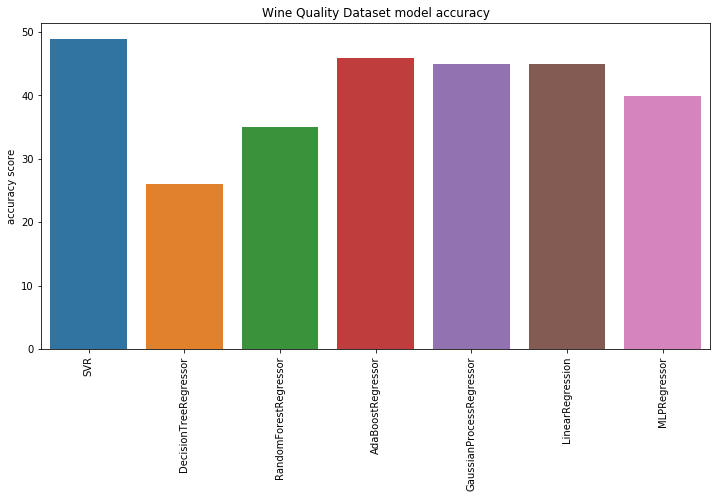

In [18]:
#Comparision graph between all models
import seaborn as sns
y_pos = np.arange(len(names))
heights = [accuracy[0],accuracy[1],accuracy[2],accuracy[3],accuracy[4],accuracy[5],accuracy[6]]

fig, ax=plt.subplots(1,1,figsize=(12,6))

plt.xticks(rotation='90')
sns.barplot(x=names, y=heights)
plt.ylabel('accuracy score')
plt.title('Wine Quality Dataset model accuracy')